In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from scipy import stats

# Read and Understand data

In [3]:
df=pd.read_csv('telco customer.csv')

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The data set includes information about:

Churn: Customers who left within the last month 

Services that each customer has signed up for: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

Customer account information: tenure, Contract, PaymentMethod, PaperlessBilling, MonthlyCharges, and TotalCharges

Demographic information: gender, SeniorCitizen, Partners, Dependents

In [77]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The SeniorCitizen column, which indicates whether the customer is elderly or not, through a dummy variable (0 and 1), is properly saved as a categorical variable.

I need to change the column TotalCharges to numerical as it refers to the total amount of revenue generated by the client. It's possible to concluded that they are missing due to the fact that the customer never paied anything to the company. I'll impute this missing values with zero:

In [4]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:'Yes', 0:'No'})    

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float')

# Exploratory Data Analysis

## Target Variable

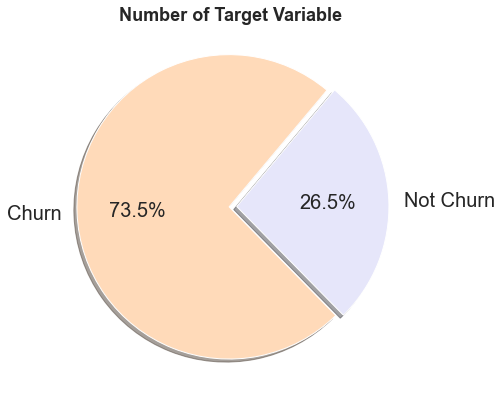

In [131]:
labels = ['Churn', 'Not Churn']
sizes = df['Churn'].value_counts(sort = True)

colors = ['peachpuff','lavender']
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle('Number of Target Variable',y=0.9, fontsize=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=50, textprops={"fontsize":20})

plt.show()

No-Churn rate is 73.5% while Churn rate is 26.5%. There seems to be a slight imbalance in the data.

## Numerical Features

In [29]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Half of the clients remain in the company for more than 29 months.

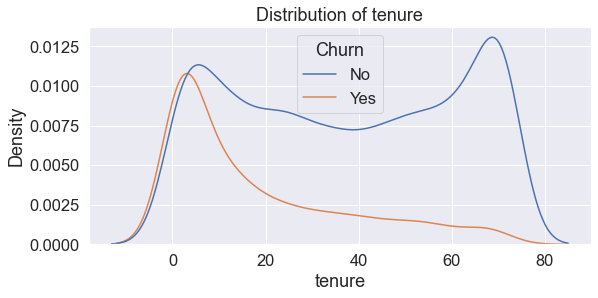

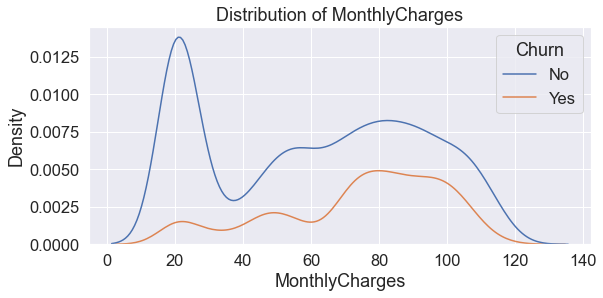

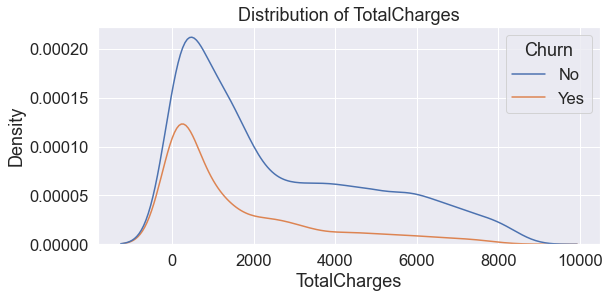

In [59]:
def kdeplot(feature):
    fig = plt.figure(figsize=(9, 4))
    plt.title('Distribution of {}'.format(feature))
    sns.kdeplot(data = df, x = feature,hue='Churn')
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

plt.show()

Recent clients are more likely to churn.

Clients with higher MonthlyCharges are also more likely to churn.

Tenure and MonthlyCharges are probably more important features than TotalCharges.

## Correlations between Numerical Variables

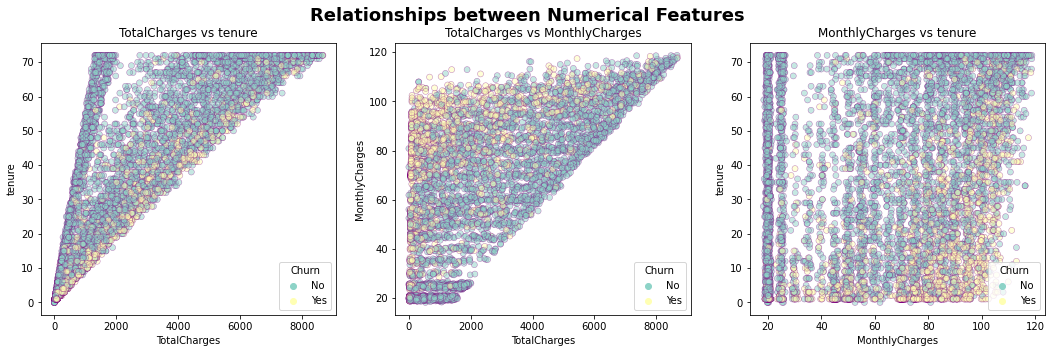

In [110]:
palette = 'Set3'
edgecolor ='purple'
alpha = 0.5

fig = plt.figure(figsize=(18,5))

plt.subplot(131)
sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn", palette = palette, edgecolor=edgecolor,
                    data = df, alpha = alpha)
plt.title('TotalCharges vs tenure')

plt.subplot(132)
sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn", palette = palette, edgecolor=edgecolor,
                    data = df, alpha = alpha)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(133)
sns.scatterplot(x = df['MonthlyCharges'], y = df['tenure'], hue = "Churn", palette = palette, edgecolor=edgecolor,
                    data = df, alpha = alpha)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Relationships between Numerical Features', fontsize=18, weight='bold')

plt.show()

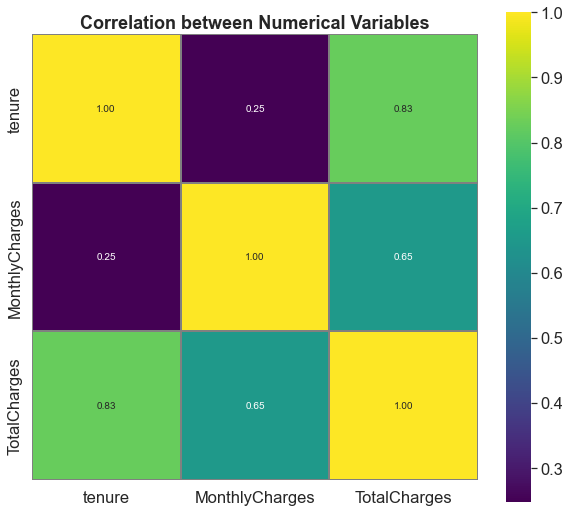

In [60]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,9))
plt.title('Correlation between Numerical Variables',y=1, fontsize=18, weight='bold')
sns.heatmap(df.corr(), annot=True, square=True, annot_kws={'size': 10},cmap = 'viridis', linewidths = .1, linecolor = 'grey', fmt=".2f")
plt.show()

There is no specific pattern between Tenure and MonthlyCharges.
There is a correlation between TotalCharges with both of MonthlyCharges and Tenure. So I will take only the tenure and monthly charges and drop the TotalCharges.

In [43]:
df.drop(columns=['TotalCharges'], inplace=True)

## Categorical Features

In [44]:
df.describe(include=object)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Most customers are not senior.

The most polpular service is streaming movies.

The major form of payment is the electronic payment.

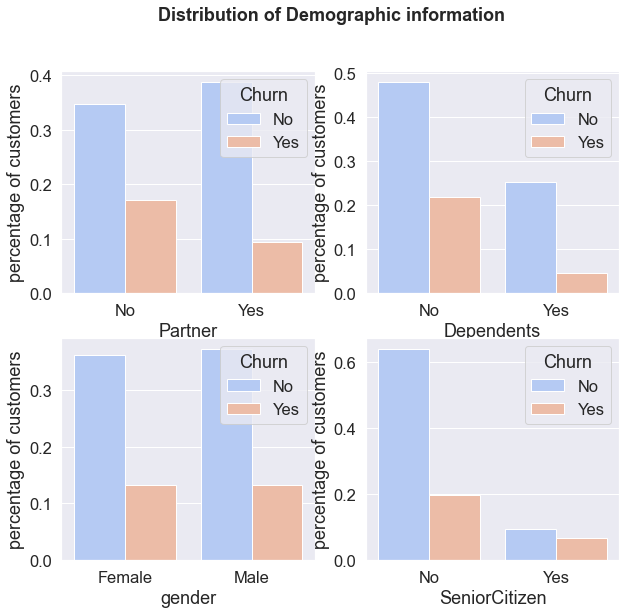

In [19]:
fig = plt.figure(figsize=(10,9))
fig.suptitle('Distribution of Demographic information', fontsize=18, weight='bold')

# Plot Partner column
plt.subplot(221)
partner = df.groupby('Partner')['Churn'].value_counts()/len(df)
partner = partner.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='Partner', y= 'percentage of customers', hue='Churn', data=partner, palette='coolwarm')

# Plot Dependents column
plt.subplot(222)
dep = df.groupby('Dependents')['Churn'].value_counts()/len(df)
dep = dep.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='Dependents', y= 'percentage of customers', hue='Churn', data=dep, palette='coolwarm')

# Plot gender column
plt.subplot(223)
gen = df.groupby('gender')['Churn'].value_counts()/len(df)
gen = gen.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='gender', y= 'percentage of customers', hue='Churn', data=gen, palette='coolwarm')

# Plot SeniorCitizen column
plt.subplot(224)
sen = df.groupby('SeniorCitizen')['Churn'].value_counts()/len(df)
sen = sen.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='SeniorCitizen', y= 'percentage of customers', hue='Churn', data=sen, palette='coolwarm')

plt.show()

The majority of people are young and have no dependents.

Males and females are almost equal for churn.

Young people are majority of the customers.

People who have no dependents are more likely to churn.

<AxesSubplot:xlabel='MultipleLines', ylabel='percentage of customers'>

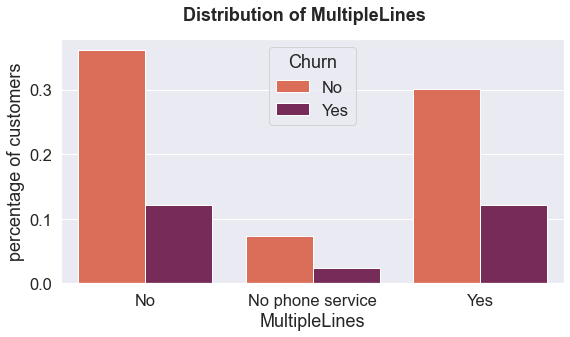

In [36]:
fig = plt.figure(figsize=(9, 4.5))
fig.suptitle('Distribution of MultipleLines', fontsize=18, weight='bold')
mul = df.groupby('MultipleLines')['Churn'].value_counts()/len(df)
mul = mul.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='MultipleLines', y='percentage of customers', data=mul, hue='Churn', palette='rocket_r')

Few customers doesn't have phone service.

Customers with multiple lines churn slightly higher.

In [13]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

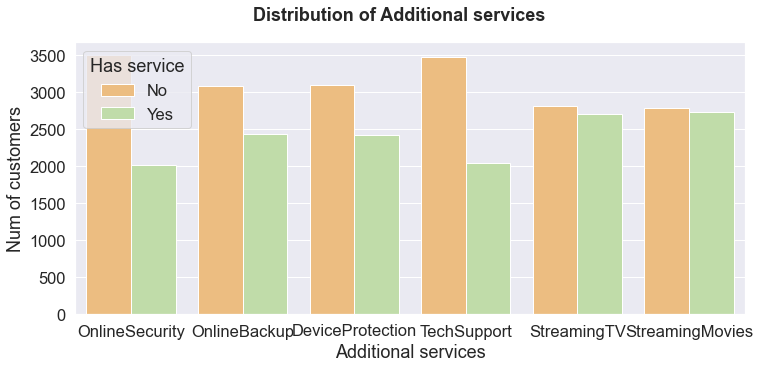

In [43]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df_service = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Distribution of Additional services', fontsize=18, weight='bold')
ax = sns.countplot(data=df_service, x='variable', hue='Has service', palette='Spectral')
ax.set_xlabel('Additional services')
ax.set_ylabel('Num of customers')

plt.show()

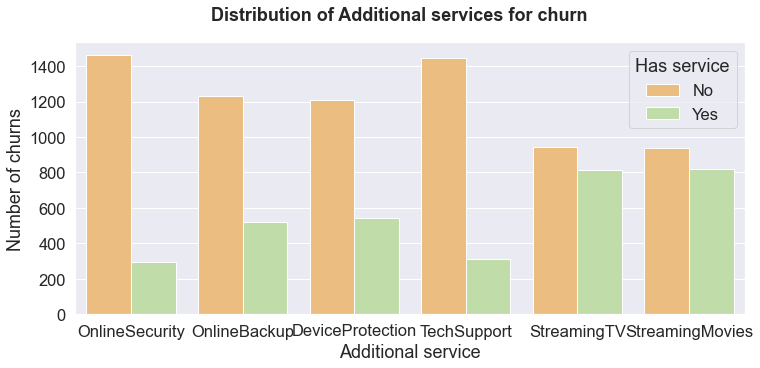

In [49]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Distribution of Additional services for churn', fontsize=18, weight='bold')
df_service = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df_service = pd.melt(df_service[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df_service, x='variable', hue='Has service', hue_order=['No', 'Yes'], palette='Spectral')
ax.set(xlabel='Additional service', ylabel='Number of churns')

plt.show()

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. 

Customers with the first 4 additional service are more unlikely to churn and streaming service is not predictive for churn.

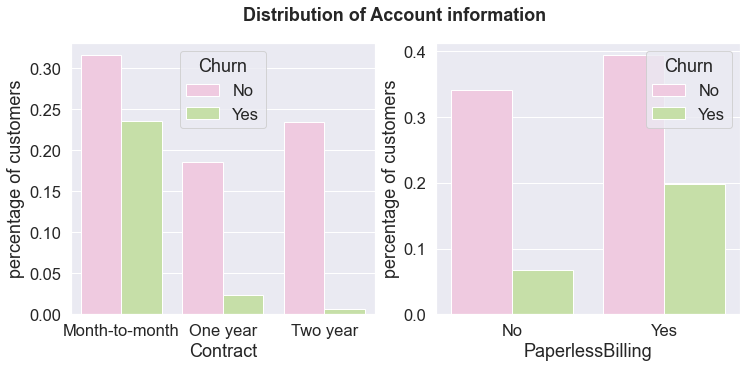

In [47]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Distribution of Account information', fontsize=18, weight='bold')

# Plot contract column
plt.subplot(121)
con = df.groupby('Contract')['Churn'].value_counts()/len(df)
con = con.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='Contract', y= 'percentage of customers', hue='Churn', data=con, palette='PiYG')

# Plot PaperlessBilling column
plt.subplot(122)
pap = df.groupby('PaperlessBilling')['Churn'].value_counts()/len(df)
pap = pap.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(x='PaperlessBilling', y= 'percentage of customers', hue='Churn', data=pap, palette='PiYG')

plt.show()

<AxesSubplot:xlabel='percentage of customers', ylabel='PaymentMethod'>

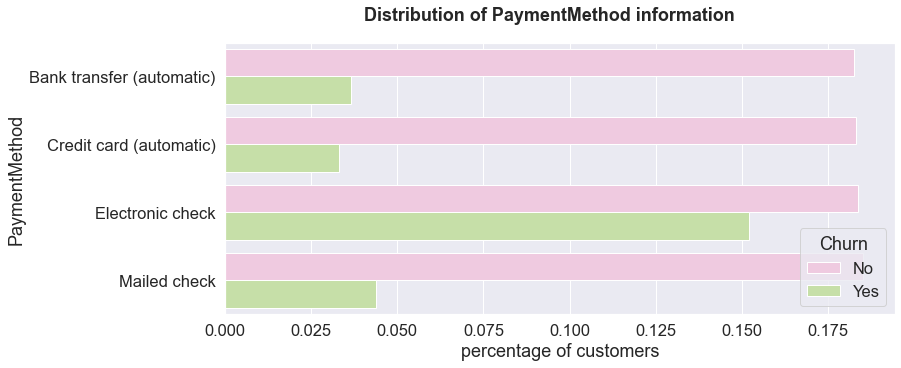

In [48]:
# Plot PaymentMethod column
fig = plt.figure(figsize=(12,5))
fig.suptitle('Distribution of PaymentMethod information', fontsize=18, weight='bold')
pay = df.groupby('PaymentMethod')['Churn'].value_counts()/len(df)
pay = pay.to_frame().rename({'Churn': 'percentage of customers'}, axis=1).reset_index()
sns.barplot(y='PaymentMethod', x= 'percentage of customers', hue='Churn', data=pay, orient='h', palette='PiYG')

Churn rate is beyond 20% for who has short-term contract.

Customers with paperless billing are more probable to churn.

Churn rate is high for who pay with Electronic check.

# Data Cleaning

## Handle missing value

In [6]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values()
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [7]:
df.duplicated().sum()

0

In [16]:
df.drop('customerID', axis=1, inplace=True)

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Detect Outlier

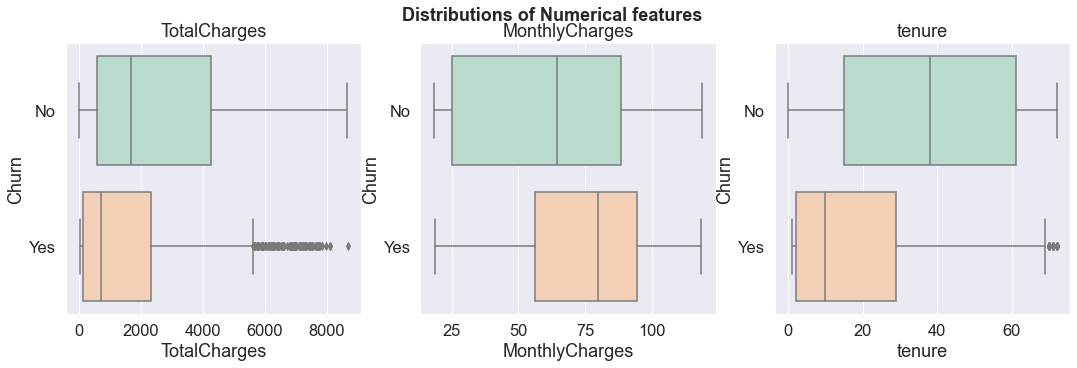

In [50]:
fig = plt.figure(figsize=(18,5))

plt.subplot(131)
sns.boxplot(x = 'TotalCharges', y='Churn', data = df, palette= 'Pastel2')
plt.title('TotalCharges')

plt.subplot(132)
sns.boxplot(x='MonthlyCharges', y = 'Churn', data = df, palette= 'Pastel2')
plt.title('MonthlyCharges')

plt.subplot(133)
sns.boxplot(x = 'tenure', y='Churn', data = df, palette= 'Pastel2')
plt.title('tenure')

fig.suptitle('Distributions of Numerical features', fontsize = 18, weight = 'bold')

plt.show()

In [27]:
z = np.abs(stats.zscore(df['TotalCharges']))
print(z)

0       0.992611
1       0.172165
2       0.958066
3       0.193672
4       0.938874
          ...   
7038    0.127605
7039    2.242606
7040    0.852932
7041    0.870513
7042    2.013897
Name: TotalCharges, Length: 7043, dtype: float64


In [28]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


So no outliers are there for TotalCharges

## Correlation and Multicollinearity

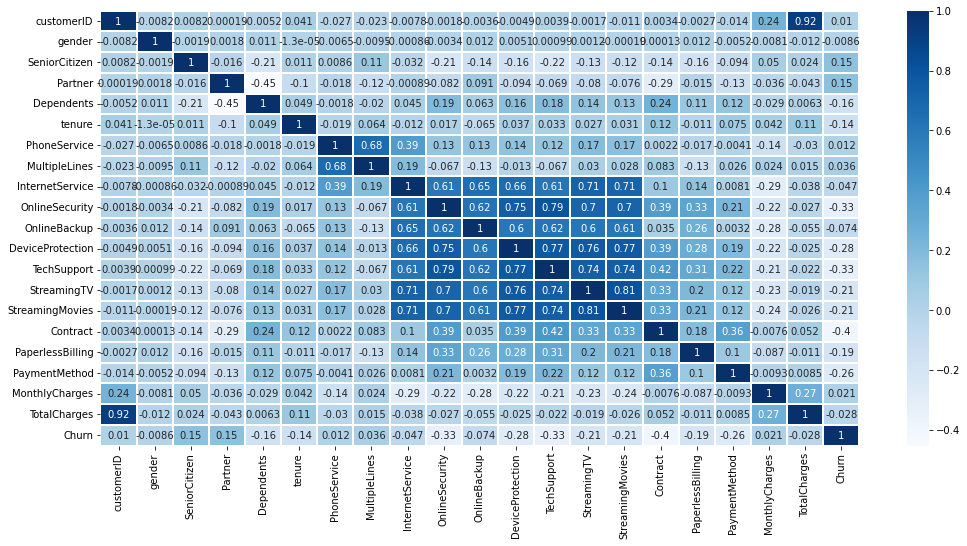

In [15]:
plt.figure(figsize=(17, 8))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap='Blues', annot=True)

Based on the matrix, it can be concluded that being senior citizen and increasing monthly charges have a positive correlation with the churn. Senior citizen more likely churn than younger customers. Customers with higher monthly charges also more likely churn. Being long term with the company, customers less likely churn. 
Total charges has negative correlation with the churn.